## Add notebook to analyze data

In [1]:
# Required packages

import pandas as pd

In [2]:
# Read files

departments_data = pd.read_csv('./Input_data/departments.csv',header=None, names=['id', 'department'])
hired_employees_data = pd.read_csv('./Input_data/hired_employees.csv',header=None, names=['id', 'name', 'datetime', 'department_id', 'job_id'])
# Convertir la columna a tipo entero
# Reemplazar NaN por -1
hired_employees_data.fillna(-1, inplace=True)
hired_employees_data['department_id'] = hired_employees_data['department_id'].astype(int)
hired_employees_data['job_id'] = hired_employees_data['job_id'].astype(int)

jobs_data= pd.read_csv('./Input_data/jobs.csv',header=None, names=['id','job'])

In [3]:
print(departments_data.to_string(index=False))

 id               department
  1       Product Management
  2                    Sales
  3 Research and Development
  4     Business Development
  5              Engineering
  6          Human Resources
  7                 Services
  8                  Support
  9                Marketing
 10                 Training
 11                    Legal
 12               Accounting


In [4]:
print(hired_employees_data.to_string(index=False))

  id                          name             datetime  department_id  job_id
   1                   Harold Vogt 2021-11-07T02:48:42Z              2      96
   2                      Ty Hofer 2021-05-30T05:43:46Z              8      -1
   3                   Lyman Hadye 2021-09-01T23:27:38Z              5      52
   4                 Lotti Crowthe 2021-10-01T13:04:21Z             12      71
   5                Gretna Lording 2021-10-10T22:22:17Z              6      80
   6                Marlow Antecki 2021-04-23T23:45:42Z              6      95
   7                  Joan Rillett 2021-10-10T01:33:31Z              9      78
   8              Ulrick Nucciotti 2021-07-24T01:28:40Z              8     169
   9            Lucretia Northcote 2021-04-01T21:22:47Z              9       8
  10                  Arty Giacobo 2022-02-08T12:27:07Z              6      62
  11                  Libbi Dowtry 2021-07-05T04:55:10Z              6      41
  12                  Jacky Oldred 2021-06-20T11:59:

In [5]:
print(jobs_data.to_string(index=False))

#server = 'LAPTOP-DF01N7UN'
#database = 'departments_globant'

 id                                  job
  1                  Marketing Assistant
  2                             VP Sales
  3                   Biostatistician IV
  4            Account Representative II
  5                         VP Marketing
  6             Environmental Specialist
  7                  Software Consultant
  8                 Office Assistant III
  9          Information Systems Manager
 10           Desktop Support Technician
 11                    Financial Advisor
 12           Computer Systems Analyst I
 13             Automation Specialist IV
 14                 Help Desk Technician
 15                  Office Assistant II
 16                   VP Quality Control
 17                  Office Assistant IV
 18                    Financial Analyst
 19                  Electrical Engineer
 20                    Chemical Engineer
 21                        Social Worker
 22                VP Product Management
 23               Administrative Officer
 24             

# Requirement #1

In [34]:
import pandas as pd

# cargar datos
departments_data = pd.read_csv('./Input_data/departments.csv', header=None, names=['id', 'department'])
hired_employees_data = pd.read_csv('./Input_data/hired_employees.csv', header=None, names=['id', 'name', 'datetime', 'department_id', 'job_id'])
jobs_data = pd.read_csv('./Input_data/jobs.csv', header=None, names=['id', 'job'])

# convertir la columna datetime a datetime
hired_employees_data['datetime'] = pd.to_datetime(hired_employees_data['datetime'])

# agregar una columna de trimestre
hired_employees_data['quarter'] = hired_employees_data['datetime'].dt.quarter

# combinar las tablas de empleados contratados y departamentos por la columna 'department_id'
hired_employees_department = pd.merge(hired_employees_data, departments_data, left_on='department_id', right_on='id')

# combinar la tabla combinada anterior y la tabla de trabajos por la columna 'job_id'
hired_employees_department_job = pd.merge(hired_employees_department, jobs_data, left_on='job_id', right_on='id')

# agrupar los datos por trimestre, departamento y trabajo y contar el número de empleados contratados
result = hired_employees_department_job.groupby(['quarter', 'department', 'job']).agg({'id': 'count'}).rename(columns={'id': 'hired_employees'}).reset_index()

# ordenar el resultado por departamento y trabajo
result = result.sort_values(['department', 'job'])

print(result)





      quarter  department                        job  hired_employees
0         1.0  Accounting  Account Representative IV                1
448       2.0  Accounting                    Actuary                1
820       3.0  Accounting         Analyst Programmer                1
1         1.0  Accounting          Assistant Manager                1
2         1.0  Accounting        Associate Professor                1
...       ...         ...                        ...              ...
817       2.0    Training                    Teacher                2
1200      3.0    Training           Technical Writer                1
447       1.0    Training      VP Product Management                1
818       2.0    Training         VP Quality Control                1
819       2.0    Training          Web Developer III                1

[1590 rows x 4 columns]


In [76]:
import pandas as pd

# cargar datos
departments_data = pd.read_csv('./Input_data/departments.csv', header=None, names=['id', 'department'])
hired_employees_data = pd.read_csv('./Input_data/hired_employees.csv', header=None, names=['id', 'name', 'datetime', 'department_id', 'job_id'])
jobs_data = pd.read_csv('./Input_data/jobs.csv', header=None, names=['id', 'job'])

# convertir la columna datetime a datetime
hired_employees_data['datetime'] = pd.to_datetime(hired_employees_data['datetime'])

# agregar una columna de trimestre para el 2021
hired_employees_data['quarter'] = hired_employees_data[hired_employees_data['datetime'].dt.year == 2021]['datetime'].dt.quarter

# combinar las tablas de empleados contratados y departamentos por la columna 'department_id'
hired_employees_department = pd.merge(hired_employees_data, departments_data, left_on='department_id', right_on='id')

# combinar la tabla combinada anterior y la tabla de trabajos por la columna 'job_id'
hired_employees_department_job = pd.merge(hired_employees_department, jobs_data, left_on='job_id', right_on='id')

# agrupar los datos por trimestre, departamento y trabajo y contar el número de empleados contratados
result = hired_employees_department_job.groupby(['quarter', 'department', 'job']).agg({'id': 'count'}).rename(columns={'id': 'hired_employees'}).reset_index()

# ordenar el resultado por departamento y trabajo
result = result.sort_values(['department', 'job'])

print(result)


# crear columnas Q1, Q2, Q3, Q4 con valor 0
result['Q1'] = 0
result['Q2'] = 0
result['Q3'] = 0
result['Q4'] = 0

# actualizar las columnas Q1, Q2, Q3, Q4 con la sumatoria de empleados contratados por trimestre
result.loc[result['quarter'] == 1, 'Q1'] = result['hired_employees']
result.loc[result['quarter'] == 2, 'Q2'] = result['hired_employees']
result.loc[result['quarter'] == 3, 'Q3'] = result['hired_employees']
result.loc[result['quarter'] == 4, 'Q4'] = result['hired_employees']

# eliminar las columnas quarter y hired_employees
result.drop(['quarter', 'hired_employees'], axis=1, inplace=True)

# ordenar el resultado por departamento y trabajo
result = result.sort_values(['department', 'job'])

print(result)

result.to_csv("result_requirement1_final.csv", index=False)

     quarter  department                            job  hired_employees
0        1.0  Accounting      Account Representative IV                1
235      2.0  Accounting                        Actuary                1
607      3.0  Accounting             Analyst Programmer                1
236      2.0  Accounting  Budget/Accounting Analyst III                1
237      2.0  Accounting                Cost Accountant                1
..       ...         ...                            ...              ...
604      2.0    Training                        Teacher                2
987      3.0    Training               Technical Writer                1
234      1.0    Training          VP Product Management                1
605      2.0    Training             VP Quality Control                1
606      2.0    Training              Web Developer III                1

[1377 rows x 4 columns]
     department                            job  Q1  Q2  Q3  Q4
0    Accounting      Account Represe

C:\Users\moren\AppData\Local\Temp\ipykernel_10324\1464613388.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = result.groupby(['department']).sum()


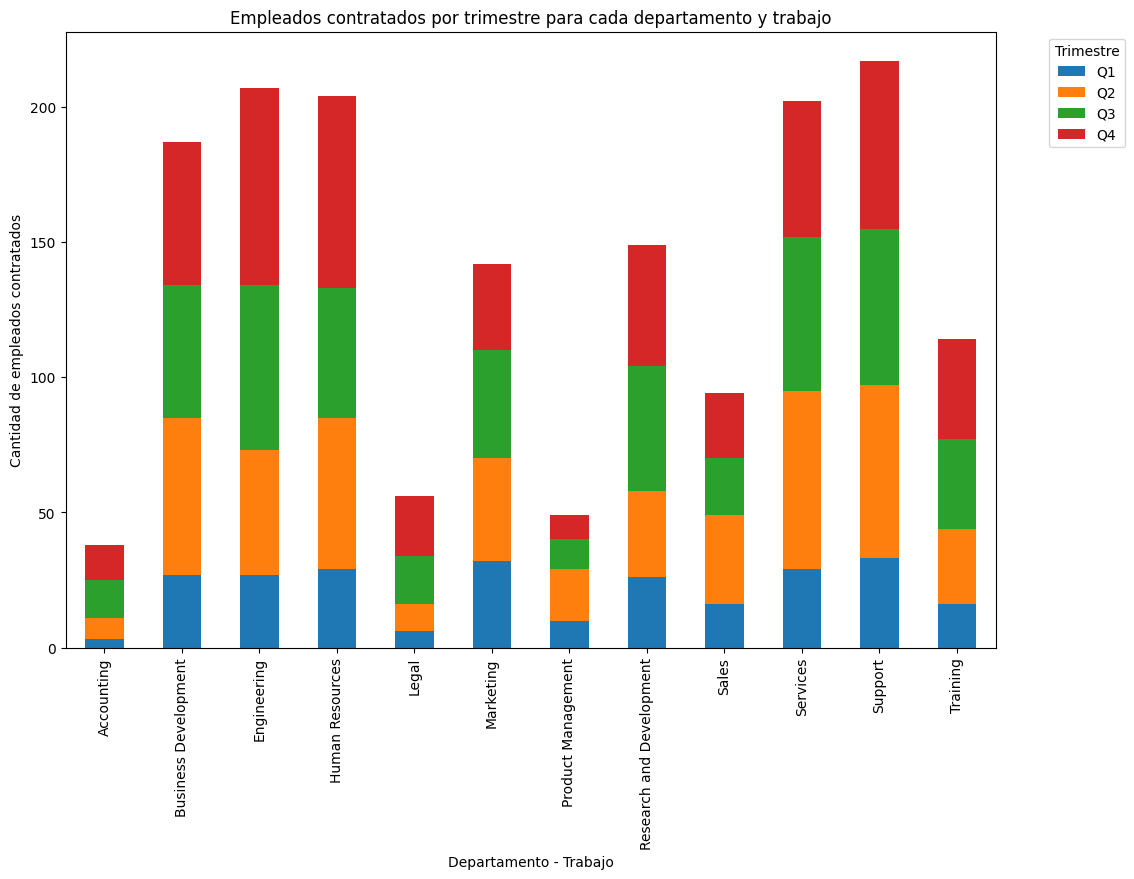

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
result = pd.read_csv("result_requirement1_final.csv")

# Agrupar los datos por departamento y trabajo
grouped = result.groupby(['department']).sum()

# Crear un DataFrame con los valores de cada trimestre para cada departamento y trabajo
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
data = pd.DataFrame(index=grouped.index, columns=quarters)
for i, row in grouped.iterrows():
    for q in quarters:
        data.at[i, q] = row[q]

# Crear la gráfica de barras apiladas
fig, ax = plt.subplots(figsize=(12,8))
data.plot(kind='bar', stacked=True, ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Empleados contratados por trimestre para cada departamento y trabajo')
ax.set_xlabel('Departamento - Trabajo')
ax.set_ylabel('Cantidad de empleados contratados')

# Configurar la leyenda
ax.legend(title='Trimestre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


C:\Users\moren\AppData\Local\Temp\ipykernel_10324\3083520368.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_filtered.groupby(['department']).sum()


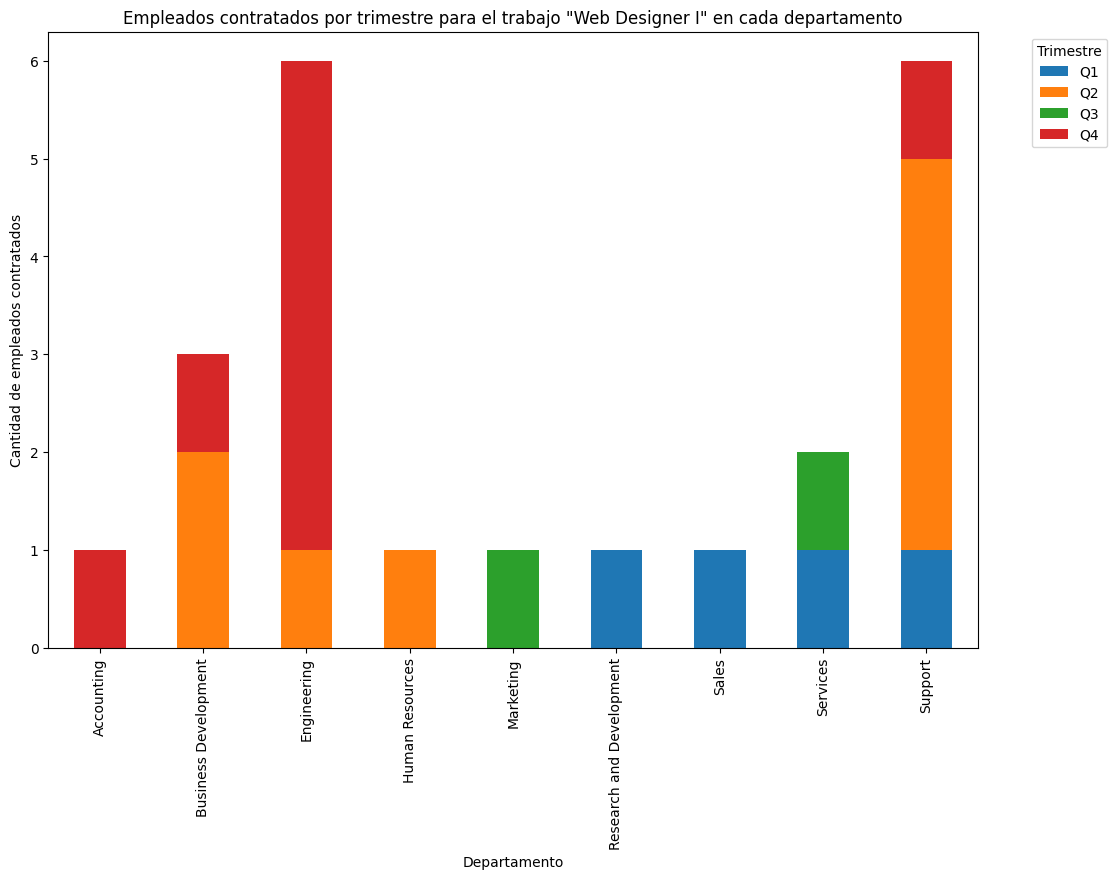

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


job = "Web Designer I"

# Filtrar los datos por el trabajo especificado
df_filtered = result[result['job'] == job]

# Agrupar los datos por departamento y trabajo
grouped = df_filtered.groupby(['department']).sum()

# Crear un DataFrame con los valores de cada trimestre para cada departamento y trabajo
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
data = pd.DataFrame(index=grouped.index, columns=quarters)
for i, row in grouped.iterrows():
    for q in quarters:
        data.at[i, q] = row[q]

# Crear la gráfica de barras apiladas
fig, ax = plt.subplots(figsize=(12,8))
data.plot(kind='bar', stacked=True, ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title(f'Empleados contratados por trimestre para el trabajo "{job}" en cada departamento')
ax.set_xlabel('Departamento')
ax.set_ylabel('Cantidad de empleados contratados')

# Configurar la leyenda
ax.legend(title='Trimestre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Requirement 2

In [74]:
import pandas as pd

# Load the data
departments_data = pd.read_csv('./Input_data/departments.csv', header=None, names=['department_id', 'department'])
hired_employees_data = pd.read_csv('./Input_data/hired_employees.csv', header=None, names=['id', 'name', 'datetime', 'department_id', 'job_id'])
jobs_data = pd.read_csv('./Input_data/jobs.csv', header=None, names=['job_id', 'job'])

# Filter the data to only include hires from 2021
hired_employees_data['datetime'] = pd.to_datetime(hired_employees_data['datetime'])
hired_employees_data = hired_employees_data[hired_employees_data['datetime'].dt.year == 2021]

# Join the dataframes to get the department and job names
department_hires = pd.merge(departments_data, hired_employees_data, left_on='department_id', right_on='department_id')
department_hires = pd.merge(department_hires, jobs_data, left_on='job_id', right_on='job_id')

# Group the hires by department and count the number of hires
department_hire_counts = department_hires.groupby(['department_id', 'department'])['id'].count().reset_index()
department_hire_counts = department_hire_counts.rename(columns={'id': 'num_hires'})

# Calculate the mean number of hires across all departments
mean_hires = department_hire_counts['num_hires'].mean()
print(mean_hires)

# Select the departments with more hires than the mean and sort them by number of hires
top_departments = department_hire_counts[department_hire_counts['num_hires'] > mean_hires].sort_values('num_hires', ascending=False)

print(top_departments[['department_id', 'department', 'num_hires']])


138.25
   department_id                department  num_hires
7              8                   Support        217
4              5               Engineering        207
5              6           Human Resources        204
6              7                  Services        202
3              4      Business Development        187
2              3  Research and Development        149
8              9                 Marketing        142


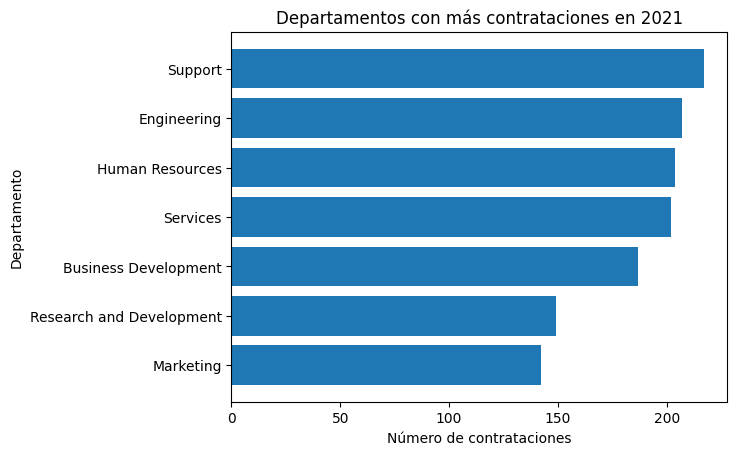

In [75]:
import matplotlib.pyplot as plt

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear la gráfica de barras horizontal
ax.barh(top_departments['department'], top_departments['num_hires'])

# Establecer el título y las etiquetas de los ejes
ax.set_title('Departamentos con más contrataciones en 2021')
ax.set_xlabel('Número de contrataciones')
ax.set_ylabel('Departamento')

# Invertir el orden de los departamentos
ax.invert_yaxis()

# Mostrar la gráfica
plt.show()
